In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score


In [14]:
df = pd.read_csv("../dataset/pmsm_temperature_data.csv")
df.head()


,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,0.187101,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,0.245417,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,0.176615,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292541,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,0.238303,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,0.208197,17


In [15]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1048575 non-null  float64
 1   coolant         1048575 non-null  float64
 2   stator_winding  1048575 non-null  float64
 3   u_d             1048575 non-null  float64
 4   stator_tooth    1048575 non-null  float64
 5   motor_speed     1048575 non-null  float64
 6   i_d             1048575 non-null  float64
 7   i_q             1048575 non-null  float64
 8   pm              1048575 non-null  float64
 9   stator_yoke     1048575 non-null  float64
 10  ambient         1048575 non-null  float64
 11  torque          1048575 non-null  float64
 12  profile_id      1048575 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 104.0 MB


u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64

In [16]:
df = df.drop(['stator_yoke',
              'stator_tooth',
              'stator_winding',
              'torque',
              'profile_id'], axis=1)


In [17]:
X = df.drop("pm", axis=1)
y = df["pm"]


In [18]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler
joblib.dump(scaler, "../model/scaler.save")


['../model/scaler.save']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.3,
    random_state=3
)


In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor()
}



In [21]:
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, "R2 Score:", r2_score(y_test, pred))



Linear Regression R2 Score: 0.6322759185631246
Decision Tree R2 Score: 0.9865971630388058


In [22]:
print("Dataset Shape:", df.shape)


Dataset Shape: (1048575, 8)


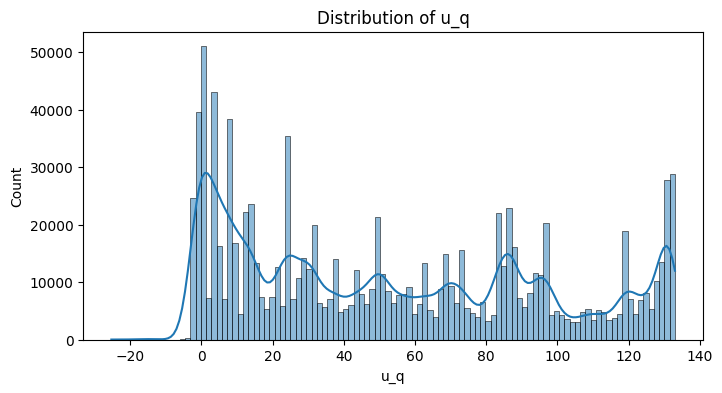

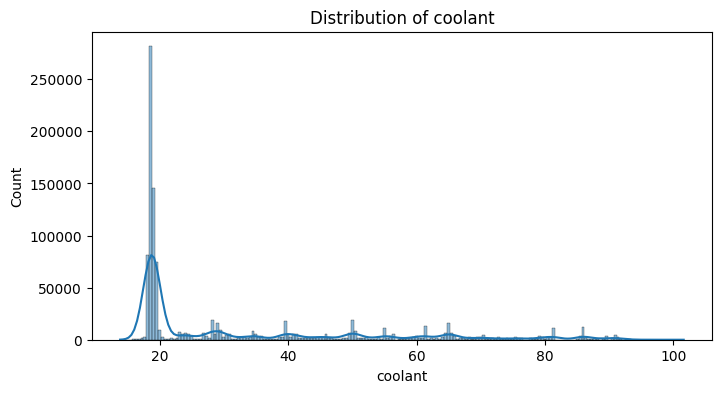

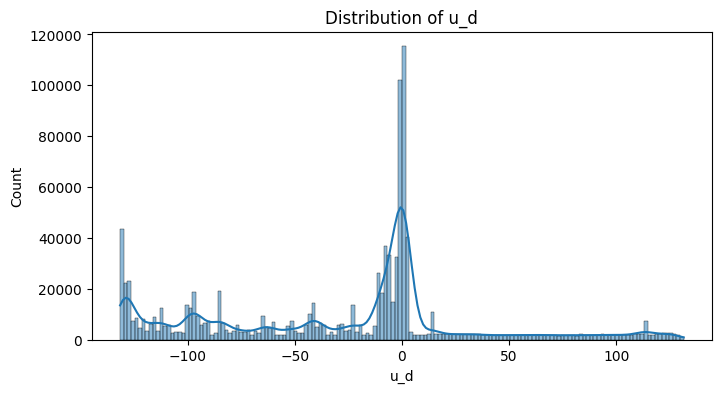

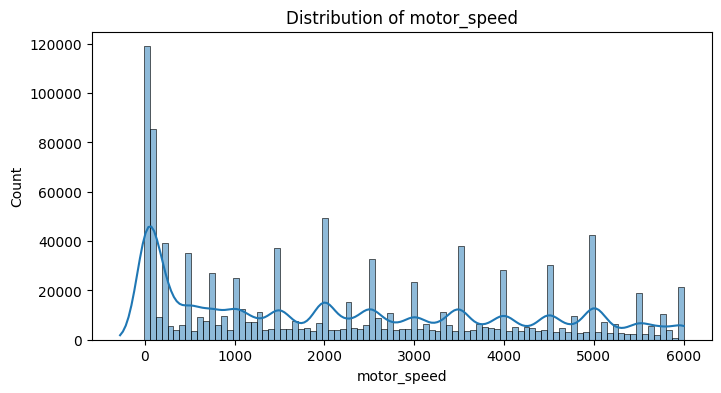

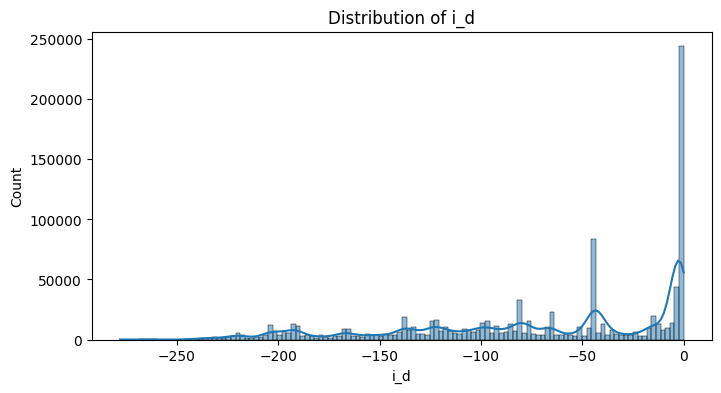

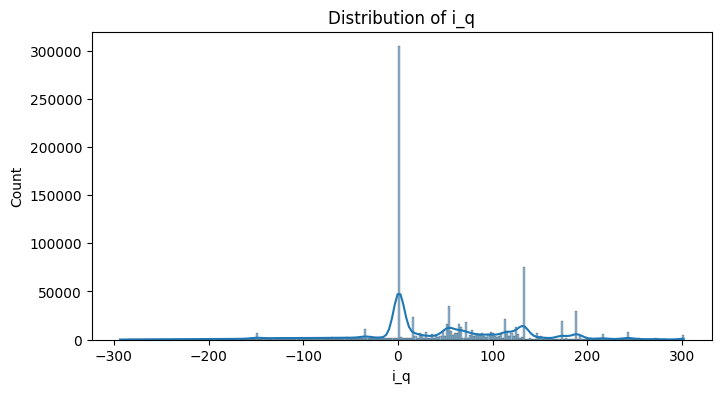

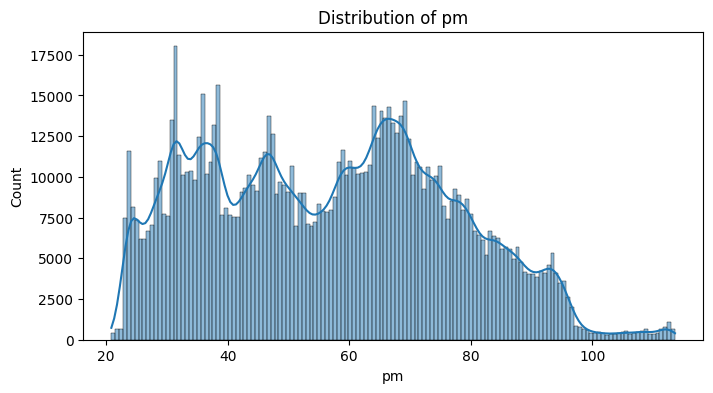

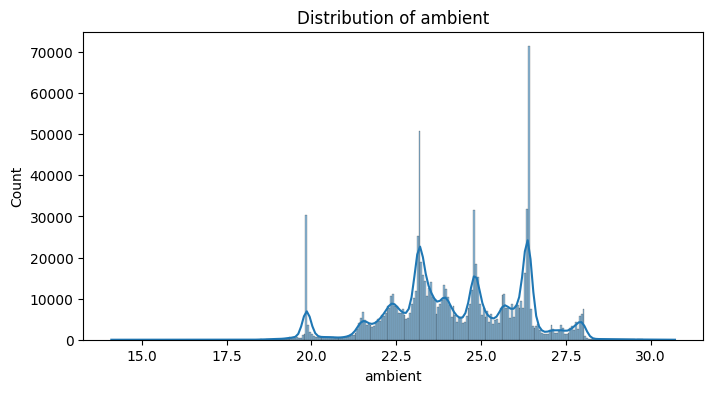

In [24]:
for col in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


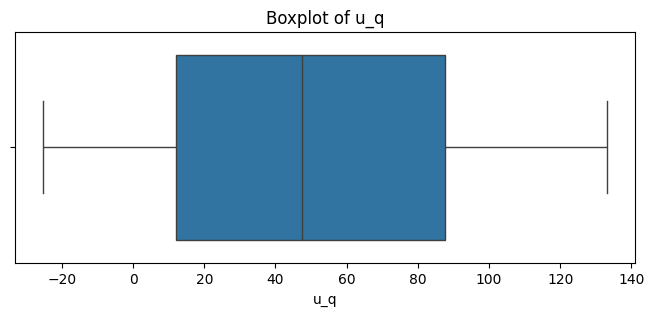

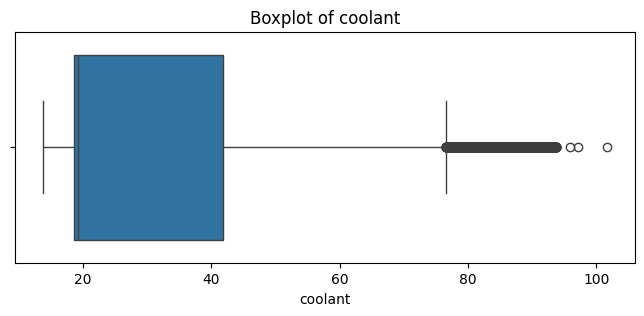

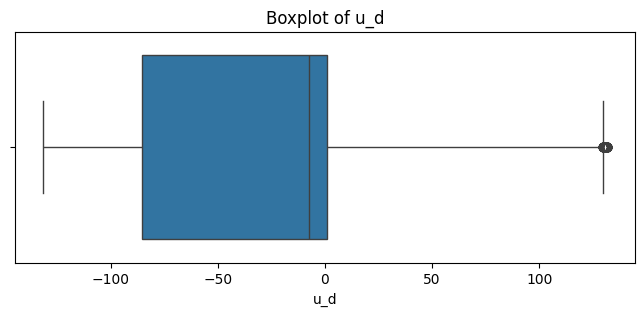

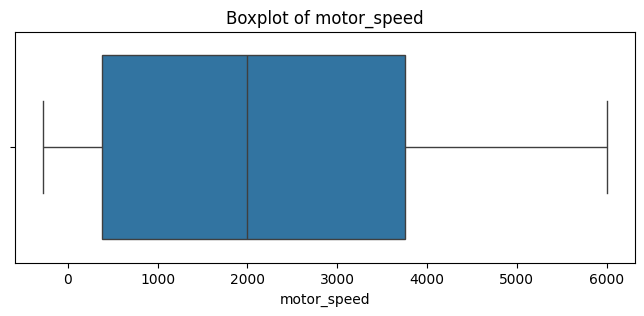

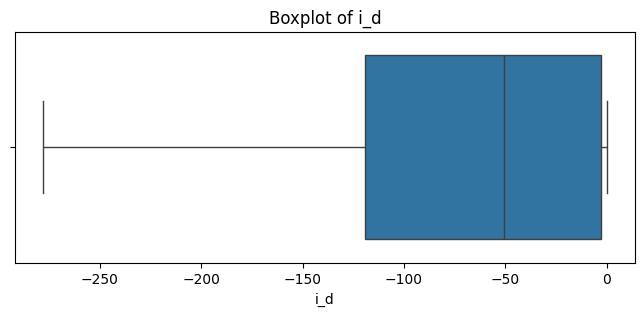

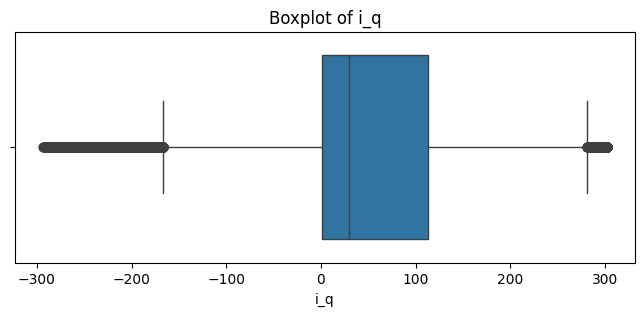

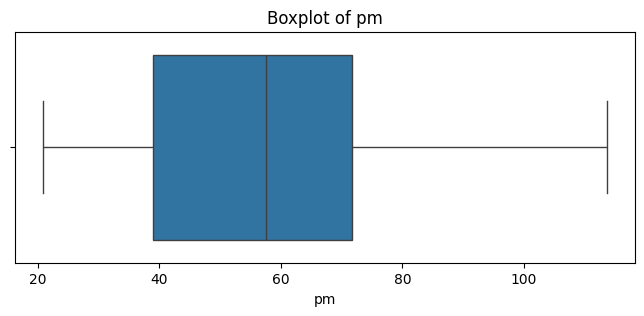

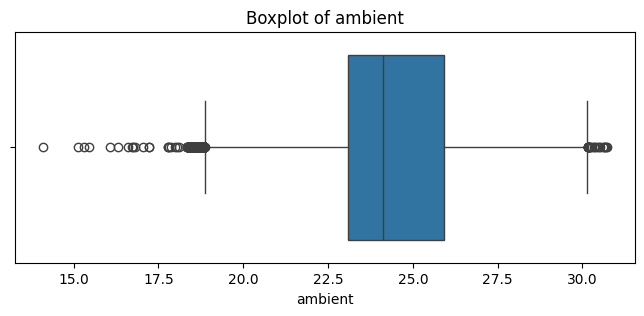

In [25]:
for col in df.columns:
    plt.figure(figsize=(8,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


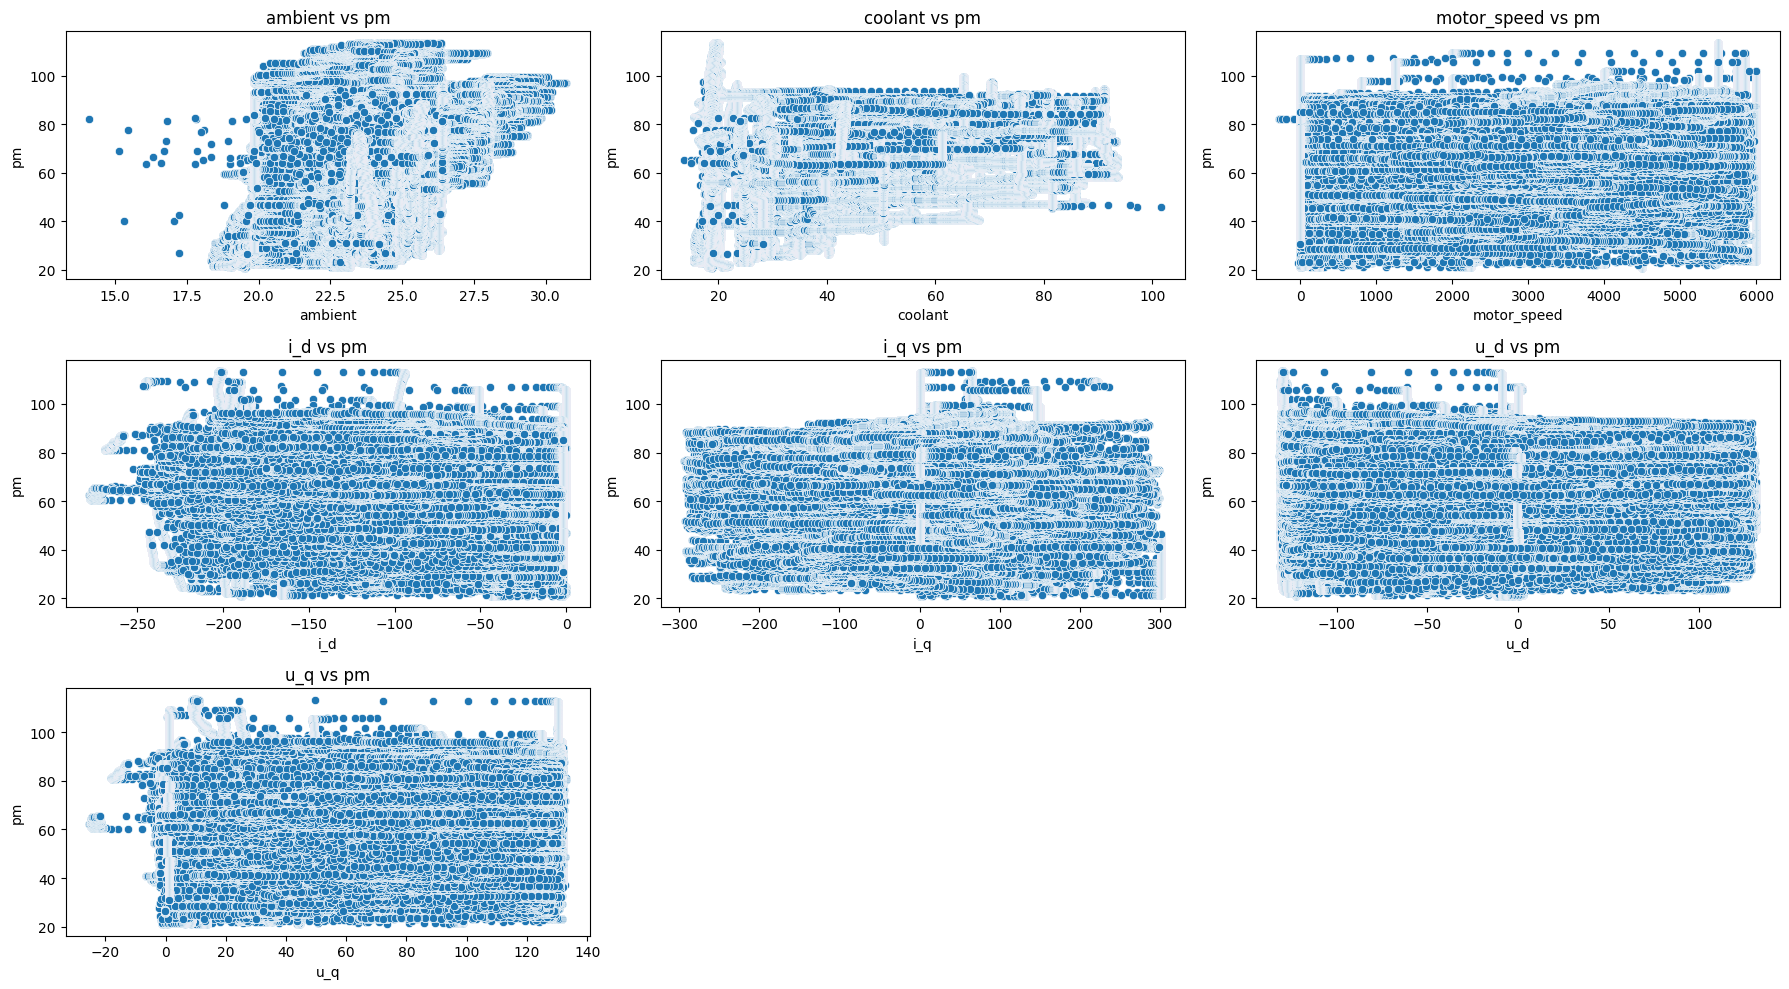

In [26]:
features = ['ambient','coolant','motor_speed','i_d','i_q','u_d','u_q']

plt.figure(figsize=(18,10))

for i, feature in enumerate(features):
    plt.subplot(3,3,i+1)
    sns.scatterplot(x=df[feature], y=df['pm'])
    plt.title(f"{feature} vs pm")

plt.tight_layout()
plt.show()


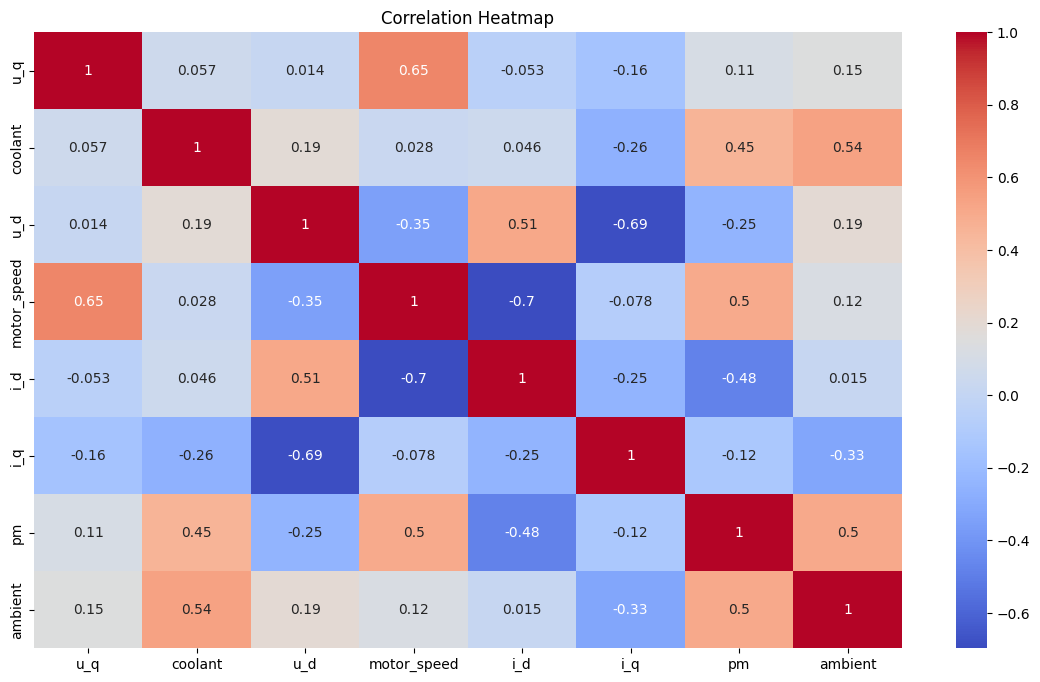

In [27]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [28]:
from sklearn.tree import DecisionTreeRegressor
import joblib

# Train final model
best_model = DecisionTreeRegressor()
best_model.fit(X_train, y_train)

# Save model
joblib.dump(best_model, "../model/model.save")

print("Model saved successfully!")


Model saved successfully!
